<a href="https://colab.research.google.com/github/PauloVieira-1/1CK130_Assignment_1/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1CK130: Assignment 1**
*Lecturers: dr. Bram De Moor, dr. Mirjam Meijer, Emre Kara Msc.*


---



## 1. Classes in Python

In this section, we briefly discuss the basics of object-oriented programming (OOP) in Python. We'll explore how to create and use classes to model real-world entities.

### What is a class?
A class is a blueprint for creating objects. Objects are instances of classes and can have attributes (characteristics they possess) and methods (actions they can perform). The code below shows how to create a `Book` class.

In [ ]:
class Book:
  # The __init__ function is called when creating an instance of a book.
  # Its role is to initialize an instance of a book.
  def __init__(self, title, author, pages):
    self.title = title
    self.author = author
    self.pages = pages

  # The __str__ function defines how an object is represented as a string
  # when you call print(obj).
  def __str__(self):
    #return f'{self.author} : {self.title}'
    return f'\"{self.title}\"'

  # __init__ and __str__ are examples of special dunder (double underscore)
  # methods.
  # We can also create our own class methods:
  # the is_long function returns a true (false) when a book has more (less or
  # equal) than 300 pages.
  def is_long(self):
    return self.pages > 300

### Creating instances of a class
Now that we have a `Book` class, let's create some book instances.

In [ ]:
# Creating book instances. Note that this calls the __init__ function
book1 = Book('To Kill a Mockingbird', 'Harper Lee', 281)
book2 = Book('1984', 'George Orwell', 328)

# Printing books. Note that this calls the __str__ function
print(book1)
print(book2)

# Here, we call the various attributes of the books and the class methods that
# we defined.
print(f'Is \"{book1.title}\" a long book? {book1.is_long()}')
print(f'The author of \"{book1.title}\" is \"{book1.author}\".')
print(f'\"{book2.author}\" wrote a book with \"{book2.pages}\" pages.')

"To Kill a Mockingbird"
"1984"
Is "To Kill a Mockingbird" a long book? False
The author of "To Kill a Mockingbird" is "Harper Lee".
"George Orwell" wrote a book with "328" pages.


### Exercises
Redefine the `Book`class below with the following changes:


1.   Add an extra attribute `publisher` to the book class.
2.   Make sure that `print(book1)` prints "`title` by `author`, published by `publisher`." e.g., 1984 by Harper Lee, published by Secker & Warburg.
3.   Add a function `is_short` to the `Book` class that returns `True` if the book is shorter than 160 pages (and `False`if the book is equal to or longer than 160 pages).



In [44]:
class Book:
    def __init__(self, title, author, pages, publisher):
        self.title = title
        self.author = author
        self.pages = pages
        self.publisher = publisher

    def __str__(self):
        return f'\"{self.title}\" by {self.author}, published by {self.publisher}'

    def is_long(self):
        return self.pages > 300
    
    def is_short(self):
        return self.pages < 160


Test the redefined `Book` class using the book 'Kruistocht in Spijkerbroek' by 'Thea Beckman' with 275 pages, published by 'Lemniscaat'.

In [45]:
book3 = Book('Kruistocht in Spijkerbroek', 'Thea Beckman', 275, 'Lemniscaat')
print(book3)
print(f'Is \"{book3.title}\" a short book? {book3.is_short()}')


"Kruistocht in Spijkerbroek" by Thea Beckman, published by Lemniscaat
Is "Kruistocht in Spijkerbroek" a short book? False


## 2. Introduction to Discrete Event Simulation (DES)
Discrete Event Simulation (DES) is a powerful technique used to model complex systems by tracking events that change the state of the system at discrete points in time, rather than continuously. This approach is particularly useful for simulating systems such as supply chains, logistics networks, queueing systems, and industrial processes. The goal of this course is to teach you about modelling logistics networks and optimizing actions based on those models. DES is a key tool for implementing those models.

### What is an event?
In the context of DES, an "event" represents a specific occurrence that changes the state of the system at a particular time. Events are typically scheduled to happen at certain times and are processed sequentially, influencing the system's behavior and the scheduling of future events.

Depending on the system that you are trying to model, you may define different types of events. We will adopt an example that involves a bike rental location where customers arrive to rent a bike, and later return that bike.
In our example, we therefore consider two types of events: (1) a customer arrival event and (2) a bike return event.

In the code below, we illustrate how to define two event types `CustomerArrivalEvent` and `BikeReturnEvent` (those are classes like the `Book` class we discussed above). Note that the `__lt__` function is a "dunder" method where "lt" stands for "less than". By implementing this method, Python knows how to compare an event class with any other class that defines the time property. This comes in handy later on when we have to add events to a list while making sure that they are processed in the correct chronological order.

In [46]:
class CustomerArrivalEvent():
  def __init__(self, time):
    self.time = time

  # This dunder method allows to compare objects using '<'.
  def __lt__(self, other):
    return self.time < other.time

  def __str__(self):
    return f'Customer arrival at t = {self.time}'

class BikeReturnEvent:
  def __init__(self, time):
    self.time = time

  def __lt__(self, other):
    return self.time < other.time

  def __str__(self):
    return f'Bike return at t = {self.time}'

Using these classes, we can create customer arrival and bike return events at specific times, and check whether one occurs before the other:

In [47]:
# A customer arrives at time 2 and 5.
customer_arrival1 = CustomerArrivalEvent(2)
customer_arrival2 = CustomerArrivalEvent(5)

# A bike is returned at time 3.
bike_return = BikeReturnEvent(3)

# The second customer does not arrive before the bike return.
print(customer_arrival2 < bike_return)


False


### Managing event occurrence using the Future Event Set (FES)
The Future Event Set (FES) is the collection of all events that are scheduled to occur in the future during a simulation. It functions as a priority queue to manage and process events based on the time they occur. The FES ensures that events are handled in chronological order, allowing the simulation to accurately reflect the sequence of events in the system.

The code below illustrates how to define a `FutureEventSet` class. Using the `heapq` Python module, we add specific functions to add an event (the `add` function), and to retrieve and process the event from the FES with the earliest time (the `next` function).

In [48]:
# We import heapq: a Python module to implement a priority queue.
import heapq

class FutureEventSet:
  def __init__(self):
    self.events = []

  # Add a new event to the FES at the position of occurrence.
  def add(self, event):
    heapq.heappush(self.events, event)

  # Return the first element of the FES and 'pop' it out.
  def next(self):
    return heapq.heappop(self.events)

  # Check if the FES is empty.
  def isEmpty(self):
    return len(self.events) == 0

  # To print the FES correclty, we need to sort it since heapq does not store
  # elements in sorted order, but only guarantees that the smallest element is
  # at index 0.
  def __str__(self):
    sortedEvents = sorted(self.events)
    return '\n'.join(str(e) for e in sortedEvents)

The code below illustrates how we can use the `FutureEventSet` to keep track of events in a bike rental simulation. We initialize the FES, add events to it, and then process these events sequentially.

In [49]:
# Initialize FES.
fes = FutureEventSet()

# Add events to FES.
fes.add(CustomerArrivalEvent(5))
fes.add(CustomerArrivalEvent(3))
print('FES after adding two customer arrivals:')
print(fes)

fes.add(BikeReturnEvent(2))
print('\nFES after adding bike return event:')
print(fes)

# Process events in FES in the order they occur.
while not fes.isEmpty():
  next_event = fes.next()
  print('\nProcessing event: ', next_event)
  print('FES now:')
  print(fes)

fes.add(CustomerArrivalEvent(3))
fes.add(BikeReturnEvent(2))

FES after adding two customer arrivals:
Customer arrival at t = 3
Customer arrival at t = 5

FES after adding bike return event:
Bike return at t = 2
Customer arrival at t = 3
Customer arrival at t = 5

Processing event:  Bike return at t = 2
FES now:
Customer arrival at t = 3
Customer arrival at t = 5

Processing event:  Customer arrival at t = 3
FES now:
Customer arrival at t = 5

Processing event:  Customer arrival at t = 5
FES now:



### Exercises

1.   Carefully review all the code and examples in this section. What do the functions `fes.add` and `fes.next` exactly do? Note that `fes.next` does two things. Which two things?

    The *fes* variable stores a FutureEventSet (a structre that holds all events remaing in a simulation). Calling "add" appends to this list. As the simulalation is moving through each event in the FES, fes.next() can be called to pop and the next event in the list. However, it does not only retrun the element. It concatentes the Event to string and returns how the object s defed as a string (__str__). 

2.   Look at the code below. What do you think `isinstance` does? What would be the output of the two print statements? Once you make up your mind, remove the # in front of the print statment to make sure that code is run and check whether you were right.

    The `isinstance` function compares the type of the first and second argument. As discussed previously, it is clear that next() does not return the bject, rather, it returns the object expressed as a string. 

In [65]:
fes.add(CustomerArrivalEvent(3))
fes.add(BikeReturnEvent(2))
print(isinstance(fes.next(), CustomerArrivalEvent))

False


### A small simulation model
Below you find a small simulation model of a bike sharing system. In this system, customers arrive after 1, 1.5, 1.6, 2.2, and 2.6 hours. Each customer that arrives takes a bike, and returns it after 1 hour. Let's assume that there are 2 bikes available at the beginning of the day. Carefully study the code below and make sure you understand it.




### Exercises

1.   At the start of this simulation, there are 2 bikes. Whenever a bike is rented or returned, the number of `bikes_available` is updated. However, we never check if there are enough bikes left, i.e., `bikes_available` may become negative. Modify the code such that if there is no bike available, then the customer leaves without bike. In that case, there will also not be a return event scheduled.

2.   How many customers leave without a bike at the end of the simulation? To answer this question, add a counter `num_cust_turned_away` that counts the number of customers that leave without a bike.

    One customer was turned away.

In [550]:
fes = FutureEventSet()

fes.add(CustomerArrivalEvent(1))
fes.add(CustomerArrivalEvent(1.5))
fes.add(CustomerArrivalEvent(1.6))
fes.add(CustomerArrivalEvent(2.2))
fes.add(CustomerArrivalEvent(2.6))

print('----- ORIGINAL FES -----')
print(fes)
print('------------------------')

rental_duration = 1
bikes_available = 2
num_cust_turned_away = 0

while not fes.isEmpty():
  event = fes.next()
  print()
  print('Next event: ', event)
  print()
  if isinstance(event, CustomerArrivalEvent):
    if bikes_available == 0:
      print('No bikes available for rent.')
      num_cust_turned_away += 1
      continue
    print('Bike rented.')
    bikes_available -= 1
    return_time = event.time + rental_duration
    fes.add(BikeReturnEvent(return_time))
  else:
    bikes_available += 1
  print('----- FES -----')
  print(fes)
  print('---------------')

print(f'Number of customers turned away: {num_cust_turned_away}')

----- ORIGINAL FES -----
Customer arrival at t = 1
Customer arrival at t = 1.5
Customer arrival at t = 1.6
Customer arrival at t = 2.2
Customer arrival at t = 2.6
------------------------

Next event:  Customer arrival at t = 1

Bike rented.
----- FES -----
Customer arrival at t = 1.5
Customer arrival at t = 1.6
Bike return at t = 2
Customer arrival at t = 2.2
Customer arrival at t = 2.6
---------------

Next event:  Customer arrival at t = 1.5

Bike rented.
----- FES -----
Customer arrival at t = 1.6
Bike return at t = 2
Customer arrival at t = 2.2
Bike return at t = 2.5
Customer arrival at t = 2.6
---------------

Next event:  Customer arrival at t = 1.6

No bikes available for rent.

Next event:  Bike return at t = 2

----- FES -----
Customer arrival at t = 2.2
Bike return at t = 2.5
Customer arrival at t = 2.6
---------------

Next event:  Customer arrival at t = 2.2

Bike rented.
----- FES -----
Bike return at t = 2.5
Customer arrival at t = 2.6
Bike return at t = 3.2
------------

## Adding randomness
Up until now, we have assumed that customer arrivals and bike returns are deterministic and known. In reality, however, the occurrence of future events is unclear. To that end, random number generators can be useful. Below, you see an example of random number generation. Review the code and answer the questions below.

In [551]:
import numpy as np
np.random.seed(123)
random_numbers = np.random.uniform(low=0, high=1, size=10)
print(random_numbers)

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]


### Exercises


1.   The code above generates 10 random numbers between 0 and 1. Call the code a number of times, by executing the cell a number of times. What do you see?

    An array of random numbers taht changes each time the code block is called. 


2.   There is also a call to `np.random.seed`, but it is outcommented. If you remove the # and again run the cell a number of times. What do you see?

    The array of numbers generated now remains the same and does not change when the code block is run


3.   So what does `np.random.seed` do?

    It persists **values** the initalally generated array of random numbers and ensures that the results are repeatable. 



### Exponentially distributed random variables
For systems where arrivals stem from a large number of independent customers, the time between arrivals can sometimes be modelled as an exponential distribution. In our bike rental simulation, we can thus generate random customer arrivals by sampling from an exponential distribution, assuming a certain scale parameter. If real data were available, we would try to choose this scale parameter such that it fits the observed interarrival distribution. The code below shows how to generate random arrivals from an exponential distribution for a working day between 8:00 and 17:00. Study it briefly to understand what it does.

In [552]:
import numpy as np

arrivals = []
scale_parameter = 0.5
start_time = 8
end_time = 17
time = start_time + np.random.exponential(scale=scale_parameter)
while time < end_time:
  arrivals.append(time)
  time += np.random.exponential(scale=scale_parameter)
print(arrivals)

[8.2101711251287, 8.863081073632529, 9.151717162034043, 9.18248356165024, 9.436269236757, 10.105965856757436, 10.206712987061776, 10.303172799979263, 10.682337219643655, 11.061796543278291, 11.56490557391013, 12.511575124889557, 13.156077876549674, 13.628196064524694, 14.269061234440846, 14.464072894122644, 14.688615788978652, 14.818171668850093, 14.9920392138747, 15.49048617989145, 15.538799419734755, 15.823116108054203, 16.104932950409157, 16.445231183712334, 16.72264631614048, 16.909819414990594]


We can encapsulate the code above in a reusable function, which will come in handy later. Note that we use `rate` instead of `scale_parameter` as an input to this function. This corresponds to the Poisson rate that drives the customer arrivals.

In [553]:
def GetArrivalTimes(start_time, end_time, rate):
  scale_parameter = 1.0 / rate
  time = start_time + np.random.exponential(scale=scale_parameter)
  arrivals = []
  while time < end_time:
    arrivals.append(time)
    time += np.random.exponential(scale=scale_parameter)
  return arrivals

Calling this function returns a list of arrival times of customers between `start_time` and `end_time`, with an average arrival rate of `rate` per hour:

In [554]:
arrivals = GetArrivalTimes(start_time=8, end_time=17, rate=2)
print(arrivals)

[9.119285056551709, 10.5619176298161, 10.91033127764261, 11.399351785246438, 11.460785100104863, 11.651624344583674, 11.919547545725855, 12.925660192216895, 13.069804897570064, 13.399694238489886, 15.518563387851678, 15.885011928736144, 16.35954096865483, 16.42381497864538]


### Exercises


1.   The code below calls the `GetArrivalTimes` function and then determines the number of customers arriving in each hour of the day, and then plots that. Run the code a number of times. What do you see? What are typical number of arrivals per hour?


    The values for the plot change whenever the code block is run (as expected). The typical umber varies depending on the numbes generated. In the case bellow, it is roughly 50 per hour. 

2.   In the context of a bike rental system, how realistic do you consider this arrival process? Any things that you think should be different?

    This does not seem very realistic. Bike rentals certainly vary depending on the time of day as well (eg: morning may have less rentals than afternoon on average). Thus, it is not sufficient to only generate random numbers (on an exponential distribution) and keep the arrival rate constant. 



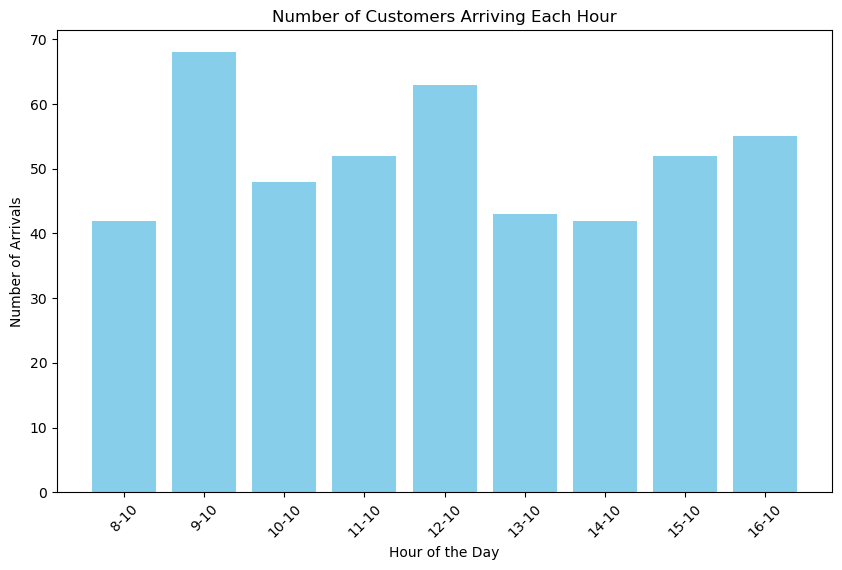

In [699]:
import matplotlib.pyplot as plt

# Generate arrival.
arrivals = GetArrivalTimes(start_time=8, end_time=17, rate=50)

# Count arrivals per hour.
count_per_hour = [0] * 9
for arrival in arrivals:
  hour = int(arrival)
  count_per_hour[hour - 8] += 1

# Plot the results.
hours = [f'{8+i}-{9+1}' for i in range(9)]
plt.figure(figsize=(10,6))
plt.bar(hours, count_per_hour, color='skyblue')
plt.title('Number of Customers Arriving Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.show()

### Varying the arrival rate over the day
We saw that our `GetArrivalTimes` function, which uses the same arrival rate during the day, may not always be realistic. It is reasonable to believe that more bikes are rented during peak hours. To enable more realistic arrival patterns, we define the following function. It generates customer arrivals following an inhomogeneous Poisson process, i.e., interarrival times are exponential, but the scale of the exponential distributions varies over the hours of the day.

In [700]:
def GetArrivalTimesByHour(start_hour, end_hour, hourly_rates):
  # Check if hourly_rates list is valid.
  expected_length = end_hour - start_hour
  if len(hourly_rates) != expected_length:
    raise ValueError(f'hourly_rates list must have at least {expected_length} elements, but got {len(hourly_rates)}!')
  if any(rate < 0 for rate in hourly_rates):
    raise ValueError('All rates in hourly_rates must be non-negative!')

  # Generate customer arrivals per hour.
  arrivals = []
  for hour in range(start_hour, end_hour):
    rate_index = hour - start_hour
    rate = hourly_rates[rate_index]
    scale_parameter = 1.0 / rate
    next_time = hour
    while next_time < hour + 1:
      next_time += np.random.exponential(scale=scale_parameter)
      if next_time < hour + 1:
        arrivals.append(next_time)

  return arrivals

### Exercise
Test the code by plotting arrivals per hour (i.e., creating a bar chart) for a working day from 8:00 to 17:00 with the following average arrival rate per hour: `[5,40,40,15,15,15,10,5,20]`.

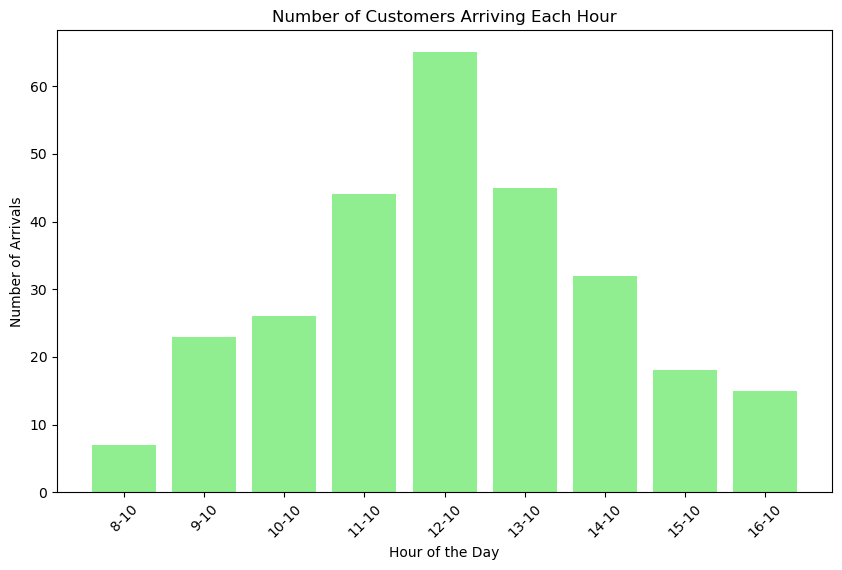

In [751]:
import matplotlib.pyplot as plt

arrivals = GetArrivalTimesByHour(
  start_hour=8,
  end_hour=17,
  hourly_rates=[10, 20, 30, 40, 50, 40, 30, 20, 10]
)

count_per_hour = [0] * 9
for arrival in arrivals:
  hour = int(arrival)
  count_per_hour[hour - 8] += 1

hours = [f'{8+i}-{9+1}' for i in range(9)]
plt.figure(figsize=(10,6))
plt.bar(hours, count_per_hour, color='lightgreen')
plt.title('Number of Customers Arriving Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.show()

## Main assignment: a first simulation model
Let's now make an actual simulation model. We consider a single bike rental location that rents bikes between a start time and an end time, that we shall assume to be **7:00 to 20:00**. Customers arrive following an inhomogeneous Poisson process, which implies that interarrival times are exponential. A typical demand pattern is shown next:

In [752]:
demand_pattern = [20,120,80,70,60,60,60,50,40,40,40,40,40]

We have **200 bikes available** at the beginning of the day. An arriving customer will rent a bike if one is available, or leave without a bike if none is available. When renting a bike, the customer will **return the bike after exactly 3 hours**. Reusing functions defined earlier, write a Python script that:

1.   Generates the arrival times of customers over the day, following the given `demand_pattern`. Feel free to reuse the functions provided earlier.
2.   Creates a FES and adds one customer arrival to that FES for each arrival time generated in step 1.
3.   Processes the events in the FES one by one, checking whether a bike is available. If a bike is available, you should schedule the bike return and register the succesfull withdrawal.

Write your code in a function `PerformSimulation` which has the following inputs: `start_time`, `end_time`, `total_bikes` (total bikes in the system) and `hourly_rates` (average demand rate per hour). The output of `PerformSimulation` should be the `service_level` (i.e., 1 - customers turned away / total demand).

Run your code a couple of times and check the resulting service level. What do you observe?

In [753]:
def PerformSimulation(start_time, end_time, total_bikes, hourly_rates):

  # ADD YOUR CODE HERE.

  return service_level

Repeat the `PerformSimulation` 100 times to calculate the `mean_service_level`. Run this repetition a couple of times and check the mean service level. What do you observe? Now repeat the simulation 1000 times instead of 100 and check the mean service level. What do you observe now?


In [754]:
# ADD YOUR CODE HERE.

The assumption that all customers return their bike after *exactly* 3 hours is not very realistic. In reality, the rental duration is also random. Assume that the duration of a bike rental is uniformly distributed between 2 and 4 hours. Starting from the `PerformSimulation` function, create a new function `PerformSimulation2` that incorporates random rental durations.  

In [755]:
def PerformSimulation2(start_time, end_time, total_bikes, hourly_rates):

  # ADD YOUR CODE HERE.

  return service_level

Repeat `PerformSimulation2` a 100 times to calculate the mean service level.

In [756]:
# ADD YOUR CODE HERE.

Finally, write a small script to estimate the total bikes needed to get a mean service level of around 99%.

In [757]:
# ADD YOUR CODE HERE.